# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

C:\Users\SHOLAY\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

# Loading the dataset

In [3]:
column_type= {
    'MSISDN/Number': 'Int64',
    'Avg RTT DL (ms)': "Int64",
    'Avg RTT UL (ms)': 'Int64',
    'Avg Bearer TP DL (kbps)': 'Int64',
    'Avg Bearer TP UL (kbps)': 'Int64',
    'TCP DL Retrans. Vol (Bytes)': 'Int64',
    'TCP UL Retrans. Vol (Bytes)': 'Int64',
    'DL TP < 50 Kbps (%)': 'Int32',
    '50 Kbps < DL TP < 250 Kbps (%)': 'Int32',
    '250 Kbps < DL TP < 1 Mbps (%)': 'Int32',
    'DL TP > 1 Mbps (%)': 'Int32',
    'UL TP < 10 Kbps (%)': 'Int32',
    '10 Kbps < UL TP < 50 Kbps (%)': 'Int32',
    "50 Kbps < UL TP < 300 Kbps (%)": 'Int32',
    'UL TP > 300 Kbps (%)': 'Int32',
    'HTTP DL (Bytes)': 'Int64',
    'HTTP UL (Bytes)': 'Int64',
    'Activity Duration DL (ms)': 'Int64',
    'Activity Duration UL (ms)': 'Int64',
    'Nb of sec with 31250B < Vol DL < 125000B': 'Int32',
    'Nb of sec with 37500B < Vol UL': 'Int32',
    'Nb of sec with 6250B < Vol DL < 31250B': 'Int32'
}

The excel file takes a longer time to load, so I converted it to CSV

In [4]:
data= pd.read_csv("Week2_challenge_data_source.csv", dtype= column_type)
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms)2,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Unnamed: 55
0,1.311450e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082010e+14,33664962239,3.552120e+13,9.16457E+15,42,5,23,44,<NA>,<NA>,100,0,0,0,100,0,0,0,<NA>,<NA>,37624,38787,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,<NA>,<NA>,<NA>,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,NaN
1,1.311450e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082020e+14,33681854413,3.579400e+13,L77566A,65,5,16,26,<NA>,<NA>,100,0,0,0,100,0,0,0,<NA>,<NA>,168,3560,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,<NA>,<NA>,<NA>,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,NaN
2,1.311450e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082000e+14,33760627129,3.528150e+13,D42335A,<NA>,<NA>,6,9,<NA>,<NA>,100,0,0,0,100,0,0,0,<NA>,<NA>,0,0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,<NA>,<NA>,<NA>,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,NaN
3,1.311450e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082010e+14,33750343200,3.535660e+13,T21824A,<NA>,<NA>,44,44,<NA>,<NA>,100,0,0,0,100,0,0,0,<NA>,<NA>,3330,37882,1.321510e+09,undefined,undefined,NaN,NaN,<NA>,<NA>,<NA>,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0,NaN
4,1.311450e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082010e+14,33699795932,3.540700e+13,D88865A,<NA>,<NA>,6,9,<NA>,<NA>,100,0,0,0,100,0,0,0,<NA>,<NA>,0,0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,<NA>,<NA>,<NA>,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0,NaN


Changing the data type of application

In [5]:
data= data.astype({
    'Social Media DL (Bytes)': np.int, 'Social Media UL (Bytes)': np.int, 'Google DL (Bytes)': np.int,'Google UL (Bytes)': np.int,'Email DL (Bytes)': np.int,'Email UL (Bytes)': np.int,
    'Youtube DL (Bytes)':np.int, 'Youtube UL (Bytes)': np.int,'Netflix DL (Bytes)': np.int,'Netflix UL (Bytes)': np.int,'Gaming DL (Bytes)': np.int,'Gaming UL (Bytes)':np.int,'Other DL (Bytes)': np.int,'Other UL (Bytes)': np.int
})

In [6]:
data.tail()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms)2,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Unnamed: 55
149996,7.277830e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082020e+14,33650688697,3.548310e+13,D20434A,32,0,52,65,<NA>,<NA>,100,0,0,0,100,0,0,0,<NA>,<NA>,42376,41915,81230763.0,Apple,Apple iPhone 8 Plus (A1897),NaN,NaN,<NA>,<NA>,<NA>,NaN,223.0,229.0,3464974,52091,9967603,2817311,57639,633237,16191667,11763428,17883703,19678161,526609673,9197207,3264510,13487416,57628851.0,574175259.0,NaN
149997,7.349880e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082020e+14,33663449963,3.566050e+13,D10223C,27,2,23,54,<NA>,<NA>,100,0,0,0,100,0,0,0,<NA>,<NA>,17264,16759,97970704.0,Apple,Apple iPhone Se (A1723),NaN,NaN,<NA>,<NA>,<NA>,NaN,105.0,102.0,2344568,7613,2229420,2185941,1954414,167304,13877234,8288284,19350146,21293148,626893062,4735033,712180387,2457758,39135081.0,666648844.0,NaN
149998,1.311450e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082020e+14,33621890103,3.572120e+13,T51102A,43,6,43,47,<NA>,<NA>,100,0,0,0,100,0,0,0,<NA>,<NA>,25003,28640,98249527.0,Apple,Apple iPhone Xs (A2097),NaN,NaN,<NA>,<NA>,<NA>,NaN,104.0,108.0,1245845,14394,3850890,2734579,1525734,532543,22660510,1855903,9963942,5065760,553539484,13394316,121100856,11314729,34912224.0,592786405.0,NaN
149999,1.311450e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082020e+14,33619622058,8.618620e+13,L88342B,37,5,34,37,<NA>,<NA>,100,0,0,0,100,0,0,0,<NA>,<NA>,13405,34088,97910631.0,Huawei,Huawei Fig-Lx1,NaN,NaN,<NA>,<NA>,<NA>,NaN,43.0,82.0,801547,21562,4189773,3567494,2228270,622644,8817106,8305402,3322253,13172589,352536971,2529475,814713113,1406930,29626096.0,371895920.0,NaN
150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,NaN,NaN,NaN,1795321,32928,5750752,2056541,1791728,467373,11634072,11009410,11626851,11001754,422044702,8288398,421100544,8264799,NaN,NaN,NaN


##  Data exploration and overview

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 56 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  Int64  
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

Data shape (rows, columns)

In [8]:
data.shape

(150001, 56)

### Total number of missing values in each columns

In [9]:
data.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

### Statistical summary of the dataset

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Bearer Id,149010.0,1.013887e+19,2.893170e+18,6.917540e+18,7.349880e+18,7.349880e+18,1.304240e+19,1.318650e+19
Start ms,150000.0,4.991882e+02,2.886118e+02,0.000000e+00,2.500000e+02,4.990000e+02,7.490000e+02,9.990000e+02
End ms,150000.0,4.988009e+02,2.880977e+02,0.000000e+00,2.510000e+02,5.000000e+02,7.500000e+02,9.990000e+02
Dur. (ms),150000.0,1.046086e+05,8.103762e+04,7.142000e+03,5.744050e+04,8.639900e+04,1.324302e+05,1.859336e+06
IMSI,149431.0,2.082017e+14,2.149289e+10,2.040470e+14,2.082010e+14,2.082020e+14,2.082020e+14,2.140740e+14
MSISDN/Number,148935.0,4.188282e+10,2.447443e+12,3.360100e+10,3.365130e+10,3.366371e+10,3.368349e+10,8.823970e+14
IMEI,149429.0,4.847454e+13,2.241637e+13,4.400150e+11,3.546070e+13,3.572200e+13,8.611970e+13,9.900120e+13
Avg RTT DL (ms),122172.0,1.097957e+02,6.197827e+02,0.000000e+00,3.200000e+01,4.500000e+01,7.000000e+01,9.692300e+04
Avg RTT UL (ms),122189.0,1.766288e+01,8.479352e+01,0.000000e+00,2.000000e+00,5.000000e+00,1.500000e+01,7.120000e+03
Avg Bearer TP DL (kbps),150000.0,1.330005e+04,2.397188e+04,0.000000e+00,4.300000e+01,6.300000e+01,1.971075e+04,3.781600e+05


# The rest of the analysis will be base on customer with ID and MSISDN/Number
*Those without ID are dropped*

In [11]:
index_todrop= data[data['Bearer Id'].isna()].index.values
data.drop(index_todrop, axis= 0, inplace= True)
index_todrop= data[data['MSISDN/Number'].isna()].index.values
data.drop(index_todrop, axis= 0, inplace= True)
data= data.astype({'Total UL (Bytes)': 'Int32', 'Total DL (Bytes)': 'Int32'})

## Data overview after cleaning

In [12]:
data.info(memory_usage= 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148506 entries, 0 to 149999
Data columns (total 56 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 148506 non-null  float64
 1   Start                                     148506 non-null  object 
 2   Start ms                                  148506 non-null  float64
 3   End                                       148506 non-null  object 
 4   End ms                                    148506 non-null  float64
 5   Dur. (ms)                                 148506 non-null  float64
 6   IMSI                                      148506 non-null  float64
 7   MSISDN/Number                             148506 non-null  Int64  
 8   IMEI                                      148506 non-null  float64
 9   Last Location Name                        148346 non-null  object 
 10  Avg RTT DL (ms)     

In [13]:
data.isna().sum()

Bearer Id                                        0
Start                                            0
Start ms                                         0
End                                              0
End ms                                           0
Dur. (ms)                                        0
IMSI                                             0
MSISDN/Number                                    0
IMEI                                             0
Last Location Name                             160
Avg RTT DL (ms)                              27636
Avg RTT UL (ms)                              27616
Avg Bearer TP DL (kbps)                          0
Avg Bearer TP UL (kbps)                          0
TCP DL Retrans. Vol (Bytes)                  87764
TCP UL Retrans. Vol (Bytes)                  96128
DL TP < 50 Kbps (%)                            712
50 Kbps < DL TP < 250 Kbps (%)                 712
250 Kbps < DL TP < 1 Mbps (%)                  712
DL TP > 1 Mbps (%)             

In [14]:
pd.Series(data['Handset Type'].unique()).head()

0     Samsung Galaxy A5 Sm-A520F
1    Samsung Galaxy J5 (Sm-J530)
2       Samsung Galaxy A8 (2018)
3                      undefined
4               Samsung Sm-G390F
dtype: object

# Task 1.0

* With all the data in place.

In [15]:
top10H= data["Handset Type"].value_counts().head(11)

## Top 10 Handset used by Customers

Top 10 Handset including the ```Undefine```

Text(0.5, 1.0, 'Top 10 Handset Used by Customers')

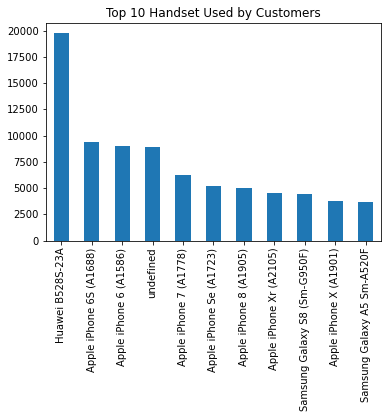

In [16]:
top10H.plot(kind= "bar").set_title("Top 10 Handset Used by Customers")

## Top 3 Handset manufacturer

In [17]:
top3_man= data["Handset Manufacturer"].value_counts().head(3)
top3_man

Apple      59339
Samsung    40429
Huawei     34296
Name: Handset Manufacturer, dtype: int64

Text(0.5, 1.0, 'Top 3 Handset manufacturer')

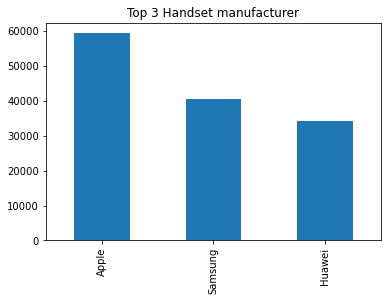

In [18]:
top3_man.plot(kind= "bar").set_title("Top 3 Handset manufacturer")

## The Top 5 handsets per handset manufacturer

In [19]:
for manufacture in data.groupby(['Handset Manufacturer']):
    print(pd.DataFrame(manufacture[1]["Handset Type"].value_counts().head()))

                                   Handset Type
A-Link Telecom I. Cubot X18 Plus              2
A-Link Telecom I. Cubot Note Plus             1
A-Link Telecom I. Cubot R9                    1
A-Link Telecom I. Cubot A5                    1
A-Link Telecom I. Cubot Power                 1
                                      Handset Type
Asustek Asus Zb552Kl Zenfone Go                  6
Asustek Asus Zenfone2 Laser Ze600Kl              5
Asustek Asus Zenfone2 Laser Ze601Kl              4
Asustek Asus Zenfone 2 Laser Ze500Kl             3
Asustek Asus Zenfone Selfie Zd551Kl              2
                       Handset Type
Acer M310                         5
Acer Liquid Zest Plus             2
Acer Liquid Z530                  1
Acer Liquid Zest 4G               1
Acer Liquid Z220                  1
                          Handset Type
Adar Stanley Mobile S231             1
                               Handset Type
Alif Communicati. Pulian Cm84             1
                        

# Task 1.1

## Number of xDR sessions

In [20]:
xdr= pd.DataFrame(data["MSISDN/Number"].value_counts())
xdr.head(10)

,MSISDN/Number
33626320676,18
33625779332,17
33614892860,17
33659725664,16
33760536639,15
33675877202,15
33667163239,13
33627080969,12
33760413819,12
33603127838,12


## Session duration

In [21]:
ses_dur= data.pivot_table(index= "MSISDN/Number", values= "Dur. (ms)")
ses_dur.head(10)

,Dur. (ms)
MSISDN/Number,
33601001722,116720.0
33601001754,181230.0
33601002511,134969.0
33601007832,49878.0
33601008617,18552.0
33601010682,126991.5
33601011634,64180.0
33601011959,86399.0
33601014694,247851.0


## The Total download (DL) and Upload (UL) data for each Users

In [22]:
total_dl= data.pivot_table(index= "MSISDN/Number", values= ["Total UL (Bytes)", "Total DL (Bytes)"])
total_dl.head(10)

,Total DL (Bytes),Total UL (Bytes)
MSISDN/Number,,
33601001722,842637466.0,36053108.0
33601001754,120755184.0,36104459.0
33601002511,556659663.0,39306820.0
33601007832,401993172.0,20327526.0
33601008617,681565208.5,47140263.5
33601010682,277603986.0,30004624.5
33601011634,276520604.0,50840929.0
33601011959,294085078.0,38575279.0
33601014694,448280086.5,46786008.0


Text(0.5, 1.0, '10 Sample for data consumption')

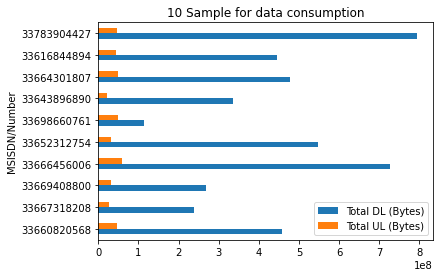

In [23]:
total_dl.sample(10).plot(kind= 'barh')
plt.title("10 Sample for data consumption")

## The total data volume (in Bytes) during this session for each application

In [24]:
d1= "Social Media DL (Bytes)	Social Media UL (Bytes)	Google DL (Bytes)	Google UL (Bytes)	Email DL (Bytes)	Email UL (Bytes)	Youtube DL (Bytes)	Youtube UL (Bytes)	Netflix DL (Bytes)	Netflix UL (Bytes)	Gaming DL (Bytes)	Gaming UL (Bytes)	Other DL (Bytes)	Other UL (Bytes)".split("	")

In [25]:
datavol= pd.DataFrame(data[d1].sum(), columns= ["Total data volume"])
datavol

,Total data volume
Social Media DL (Bytes),266589670872
Social Media UL (Bytes),4889127231
Google DL (Bytes),854172405100
Google UL (Bytes),305371781617
Email DL (Bytes),266090777923
Email UL (Bytes),69412222225
Youtube DL (Bytes),1727699265500
Youtube UL (Bytes),1634838354565
Netflix DL (Bytes),1726715161811
Netflix UL (Bytes),1633848508961


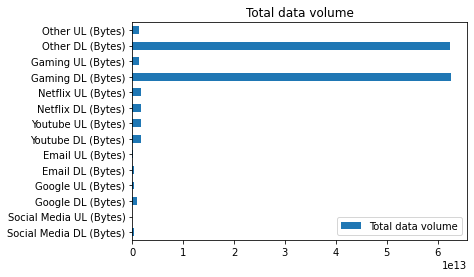

In [26]:
datavol.plot(kind= "barh")
plt.title("Total data volume")
plt.legend(loc= "lower right")

# Data summary

Number of xDR sessions,  Session duration,  the total download (DL) and upload (UL) data , the total data volume (in Bytes) during this session for each application (Social Media, Google, Email, YouTube, Netflix, Gaming).

In [27]:
d1.append("Dur. (ms)")
d1.append('Total UL (Bytes)')
d1.append('Total DL (Bytes)')

In [28]:
data[d1].describe()

,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Dur. (ms),Total UL (Bytes),Total DL (Bytes)
count,1.485060e+05,148506.000000,1.485060e+05,1.485060e+05,1.485060e+05,148506.000000,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05
mean,1.795144e+06,32922.085512,5.751770e+06,2.056293e+06,1.791785e+06,467403.486896,1.163387e+07,1.100857e+07,1.162724e+07,1.100190e+07,4.220642e+08,8.289600e+06,4.211525e+08,8.262685e+06,1.050841e+05,4.111937e+07,4.546640e+08
std,1.035470e+06,19008.988276,3.308755e+06,1.189939e+06,1.035956e+06,269981.911953,6.711236e+06,6.345625e+06,6.724994e+06,6.357930e+06,2.440043e+08,4.781967e+06,2.431639e+08,4.768806e+06,8.107274e+04,1.127844e+07,2.441791e+08
min,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,7.142000e+03,2.866892e+06,7.114041e+06
25%,8.990445e+05,16431.000000,2.883393e+06,1.023967e+06,8.926208e+05,233445.000000,5.833290e+06,5.515832e+06,5.778898e+06,5.476774e+06,2.104765e+08,4.130680e+06,2.103042e+08,4.144179e+06,5.824875e+04,3.321828e+07,2.431263e+08
50%,1.793860e+06,32917.000000,5.767399e+06,2.054222e+06,1.793642e+06,466419.000000,1.161596e+07,1.101232e+07,1.164238e+07,1.099937e+07,4.234669e+08,8.291650e+06,4.218618e+08,8.266016e+06,8.639900e+04,4.114196e+07,4.559408e+08
75%,2.694777e+06,49330.000000,8.624195e+06,3.088294e+06,2.689880e+06,700481.750000,1.744639e+07,1.651456e+07,1.747092e+07,1.650285e+07,6.332750e+08,1.243226e+07,6.316338e+08,1.238049e+07,1.329328e+05,4.903252e+07,6.657542e+08
max,3.586064e+06,65870.000000,1.146283e+07,4.121357e+06,3.586146e+06,936418.000000,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,1.859336e+06,7.833131e+07,9.029696e+08


### UNIVARIATE ANALYSIS

Text(0.5, 0, 'Google UL and DL data (Gigabbytes)')

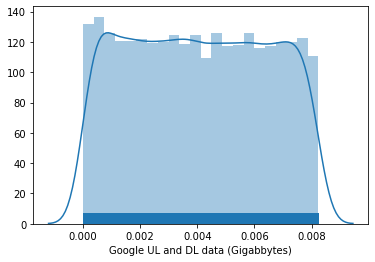

In [29]:
google_data= (data['Google UL (Bytes)']+data['Google UL (Bytes)'])/1000000000
sns.distplot(google_data.sample(10000), rug= True)
plt.xlabel("Google UL and DL data (Gigabbytes)")

Roughly distributed bell shape

Text(0.5, 0, 'Youtube UL and DL data (Gigabytes)')

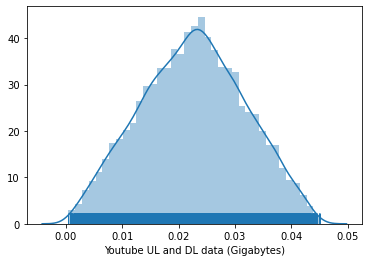

In [30]:
youtube_data= (data['Youtube DL (Bytes)']+data['Youtube UL (Bytes)'])/1000000000
sns.distplot(youtube_data.sample(10000), rug= True)
plt.xlabel("Youtube UL and DL data (Gigabytes)")

Bell shape distribution with the maximum between 235 & 250 of the range 100-470 (460)

Text(0.5, 0, 'Youtube UL and DL data (Gigabytes)')

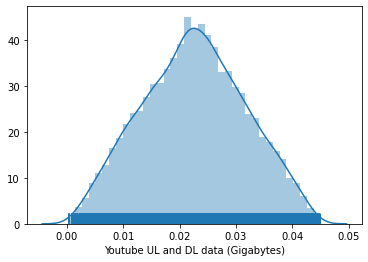

In [31]:
netflix_data= (data['Netflix DL (Bytes)']+data['Netflix UL (Bytes)'])/1000000000
sns.distplot(netflix_data.sample(10000), rug= True)
plt.xlabel("Youtube UL and DL data (Gigabytes)")

Text(0.5, 0, 'Total UL (Gigabyte)')

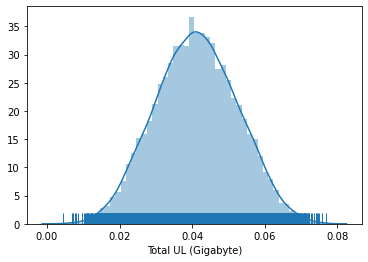

In [32]:
totalUL_data= data['Total UL (Bytes)']/1000000000
sns.distplot(totalUL_data.sample(10000).dropna(), rug= True)
plt.xlabel("Total UL (Gigabyte)")

Text(0.5, 0, 'Total DL (Gigabytes)')

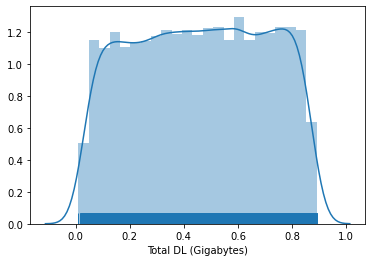

In [33]:
totalDL_data= data['Total DL (Bytes)']/1000000000
sns.distplot(totalDL_data.sample(10000).dropna(), rug= True)
plt.xlabel('Total DL (Gigabytes)')

In [34]:
data['Google DL (Bytes)'].isna().sum()

0

## Data consumption

Text(0.5, 1.0, '10 Sample for data consumption')

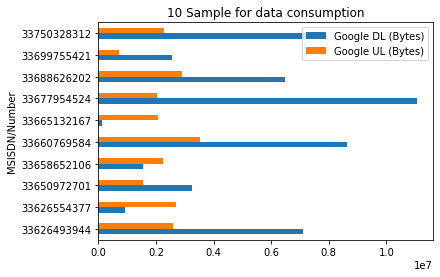

In [35]:
data.sample(10).pivot_table(index= "MSISDN/Number", values= ['Google DL (Bytes)',
 'Google UL (Bytes)']).plot(kind= 'barh')
plt.title("10 Sample for data consumption")

Text(0.5, 1.0, '10 Sample for data consumption')

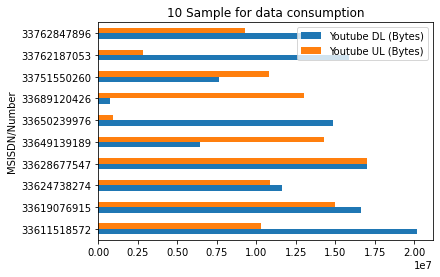

In [36]:
 data.sample(10).pivot_table(index= "MSISDN/Number", values= ['Youtube DL (Bytes)',
 'Youtube UL (Bytes)']).plot(kind= 'barh')
plt.title("10 Sample for data consumption")

Text(0.5, 1.0, '10 Sample for data consumption')

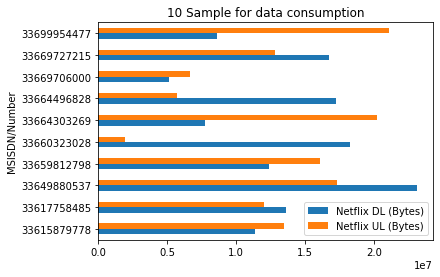

In [37]:
data.sample(10).pivot_table(index= "MSISDN/Number", values= [ 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)']).plot(kind= 'barh')
plt.title("10 Sample for data consumption")

Text(0.5, 1.0, 'Data consumption on Gaming')

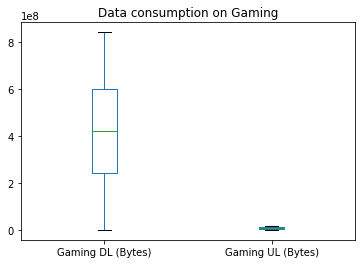

In [38]:
data.pivot_table(index= "MSISDN/Number", values= ['Gaming DL (Bytes)',
'Gaming UL (Bytes)']).plot(kind= 'box')
plt.title("Data consumption on Gaming")

Text(0.5, 1.0, 'Data consumption on Netflix')

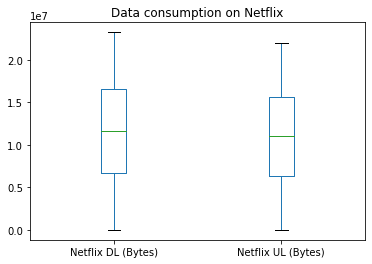

In [39]:
data.pivot_table(index= "MSISDN/Number", values= [ 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)']).plot(kind= 'box')
plt.title("Data consumption on Netflix")

Text(0.5, 1.0, 'Data consumption on Google')

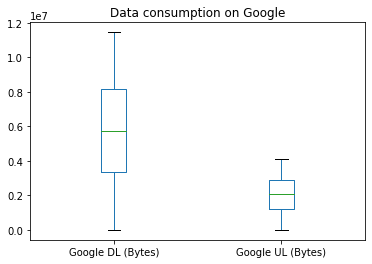

In [40]:
data.pivot_table(index= "MSISDN/Number", values= [ 'Google DL (Bytes)',
 'Google UL (Bytes)']).plot(kind= 'box')
plt.title("Data consumption on Google")

# Task 2

## Sessions frequency